# Computing diversity indices for the Tiergarten in Berlin
See this blog post for a detailed explanation: http://biodiv.smultron.org/dataset/gbif/computing-%ce%b1-diversity/#more-236

## Counting the number of species
Load the occurrences dataset cleaned-up in OpenRefine.

In [1]:
import pandas as pd
occ_df = pd.read_csv('data/Tiergarten.csv')
print("The dataset has {} rowns and {} columns".format(occ_df.shape[0], occ_df.shape[1]))

The dataset has 8934 rowns and 51 columns


In [2]:
print("The dataset lists {} species".format(len(occ_df.species.unique())))

The dataset lists 126 species


## What are the 10 most common species?

In [3]:
species_groups = occ_df.groupby(by='species')
species_groups['individualCount'].sum().sort_values(ascending=False).head(10)

species
Passer domesticus      6917
Corvus cornix          5284
Turdus merula          4178
Anas platyrhynchos     3873
Columba palumbus       3540
Grus grus              3165
Parus major            3091
Cyanistes caeruleus    2996
Columba livia          1827
Sturnus vulgaris       1804
Name: individualCount, dtype: int64

## Species counts by year

In [4]:
year_species_df = occ_df[['year', 'species']]
group_year = year_species_df.groupby(by='year')

In [5]:
for row in group_year:
    year = row[0]
    species_count = row[1]

In [6]:
year_species_df.groupby(by=['year', 'species'])

In [7]:
group_year = year_species_df.groupby('year')

In [8]:
# ignore future warnings
import warnings
warnings.filterwarnings('ignore')

species_year = pd.DataFrame(columns=['year', 'species_count'])
for row in group_year:
    year = row[0]
    species_count = len(row[1].species.unique())
    species_year = species_year.append({'year': year, 'species_count': species_count}, ignore_index=True)


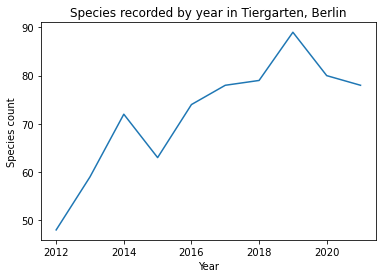

In [9]:
import matplotlib.pyplot as plt

plt.plot(species_year['year'], species_year['species_count'])
plt.xlabel('Year')
plt.ylabel('Species count')
plt.title('Species recorded by year in Tiergarten, Berlin')
#plt.savefig('fig/fig01.png')
plt.show();

## Computing Simpson's diversity index

In [20]:
# total number of occurrences
total_occ = occ_df.individualCount.sum()
# occurrences aggregated by species
species_groups = occ_df.groupby(by='species')
species_sum = species_groups['individualCount'].sum()
species_sum = pd.DataFrame(species_sum)
# add a proportion of total column
prop = [count/total_occ for count in species_sum.individualCount]
species_sum['prop'] = prop
# add a square prop column
species_sum['prop2'] = species_sum['prop']**2

In [25]:
# compute diversity index
D = 1 - species_sum['prop2'].sum()
print("The Simpson's diversity index for Tiergaten is {:.4f}".format(D))

The Simpson's diversity index for Tiergaten is 0.9456


# Effective number of species

In [29]:
Dx = 1/(1-D)
print("The effective number of species for Tiergarten is {:.0f}".format(Dx))

The effective number of species for Tiergarten is 18
